In [403]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [441]:
var_1=20+5*np.random.randn(100)
var_2=70-2*var_1+5*np.random.uniform(0,10,100)
var_3=np.random.choice(['the ones','the others'],100,replace=True, p=[0.35,1-0.35])
var_4=np.random.choice(range(4),100,replace=True)

In [442]:
df=pd.DataFrame({'var_1':var_1,
                 'var_2':var_2,
                 'var_3':var_3,
                 'var_4':var_4})
df.head()

,var_1,var_2,var_3,var_4
0,15.506175,83.442618,the ones,2
1,21.571899,63.844572,the others,2
2,10.458043,96.109613,the ones,2
3,12.455508,90.292794,the others,1
4,18.953032,78.083599,the others,2


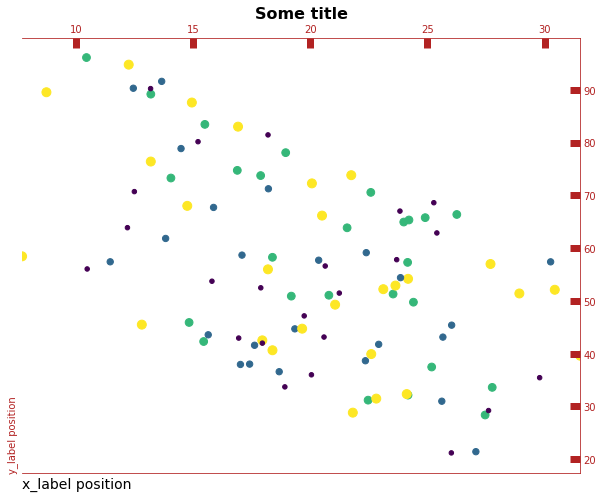

In [443]:
fig, ax= plt.subplots(figsize=(10,8))
ax.scatter(data=df,x='var_1',y='var_2',s=df['var_4']*20+20,c=df['var_4'])
ax.set_title('Some title',fontsize=16,weight='bold')

ax.set_xlabel('x_label position',loc='left',fontsize=14) # loc={'left','center'(dft),'right'}
ax.set_ylabel('y_label position',loc='bottom',color='firebrick') # loc={'botomm','center'(dft),'top'}

ax.set_xlim(df['var_1'].min(),df['var_1'].max())

# Setting ax.tick_params:
# axis={'x','y','both'(dft)}, 
# which={'major'(dft),'minor','both'}
# direction={'in','out','inout'}
ax.tick_params(axis='both',which='both',color='firebrick',direction='in',length=10,width=7) 
ax.tick_params(left=False,right='on',top='on',bottom=False,
               labelright='on',labelleft=False,labeltop='on',labelbottom=False)
ax.tick_params(colors='firebrick')

# ax.spines
for side in ['left','right','top','bottom']:
    ax.spines[side].set_color('firebrick')
ax.spines['left'].set_visible(False)
    

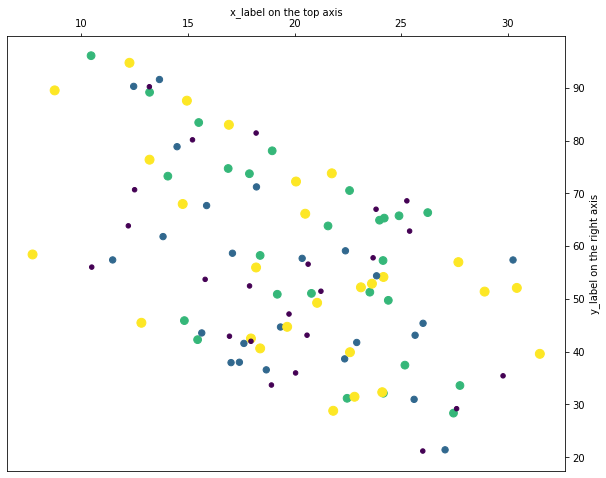

In [444]:
fig, ax= plt.subplots(figsize=(10,8))
ax.scatter(data=df,x='var_1',y='var_2',s=df['var_4']*20+20,c=df['var_4'])

ax.set_ylabel('y_label on the right axis')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()

ax.set_xlabel('x_label on the top axis')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

### Histogram along axis:
- Subplots (with gridspec)
- Changing orientation and inverting axis
- Changing the position of variable labels

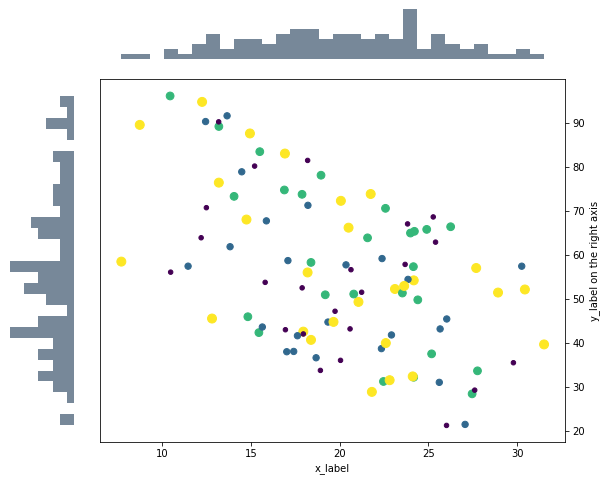

In [445]:
fig, ax = plt.subplots(figsize=(10,8))

def clear_axes_spines():
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['left','right','top','bottom']:
        ax.spines[side].set_visible(False)

from matplotlib import gridspec
gs = gridspec.GridSpec(2,2, wspace=0.1, hspace=0.1, height_ratios=[1,7], width_ratios=[1,7])


ax=plt.subplot(gs[1])
ax.hist(df['var_1'],bins=30,color='lightslategray')
clear_axes_spines()

ax=plt.subplot(gs[2])
ax.hist(df['var_2'],bins=30,color='lightslategray',orientation='horizontal')
ax.invert_xaxis()
clear_axes_spines()

ax=plt.subplot(gs[3])
ax.scatter(data=df,x='var_1',y='var_2',s=df['var_4']*20+20,c=df['var_4'])
ax.set_xlabel('x_label')
ax.set_ylabel('y_label on the right axis')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()

### Histogram and boxplot along axis:
- Settiing color of elements in boxplot
- Subplot of a subplot (with gridspec)
- Changing orientation and inverting axis
- Setting axis color 
- Setting ticks and spines as non visible
- Changing the position of variable labels

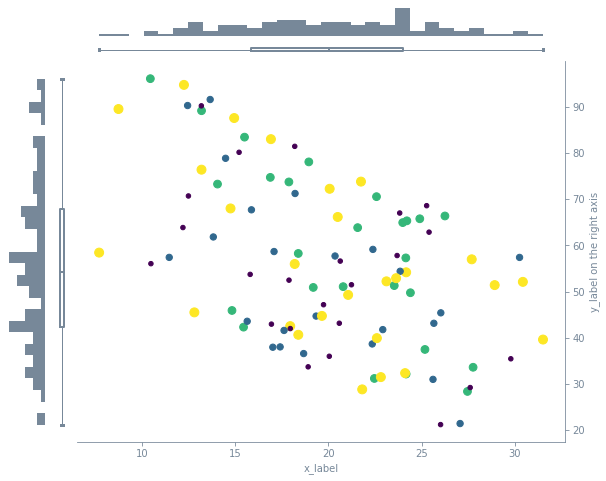

In [446]:
fig, ax = plt.subplots(figsize=(10,8))

def clear_axes_spines():
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['left','right','top','bottom']:
        ax.spines[side].set_visible(False)
        
def boxplot_color(box_name=box,color=None, lw=2):
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[item], color=color, markeredgecolor=color)
    box['boxes'][0].set(linewidth=lw) 
    box['medians'][0].set(linewidth=lw)
    box['caps'][0].set(linewidth=lw+1)
    box['caps'][1].set(linewidth=lw+1)


from matplotlib import gridspec
gs= gridspec.GridSpec(2,2, wspace=0, hspace=0, height_ratios=[1,7], width_ratios=[1,7])


gs_gs=gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=gs[1],
                                       wspace=0.05, hspace=0.05, height_ratios=[5,4])

ax=plt.subplot(gs_gs[0])
ax.hist(df['var_1'],bins=30,color='lightslategray')
clear_axes_spines()

ax=plt.subplot(gs_gs[1])
box=ax.boxplot(df['var_1'],vert=False, sym='k+') # sym for fliers style
boxplot_color(color='lightslategray') 
clear_axes_spines()


gs_gs=gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs[2],
                                       wspace=0.05, hspace=0.05, width_ratios=[5,4])

ax=plt.subplot(gs_gs[0])
ax.hist(df['var_2'],bins=30,color='lightslategray',orientation='horizontal')
ax.invert_xaxis()
clear_axes_spines()

ax=plt.subplot(gs_gs[1])
box=ax.boxplot(df['var_2'],sym='k+')
boxplot_color(color='lightslategray',lw=2)  
clear_axes_spines()


ax=plt.subplot(gs[3])
ax.scatter(data=df,x='var_1',y='var_2',s=df['var_4']*20+20,c=df['var_4'])
ax.set_xlabel('x_label', color='lightslategray')
ax.set_ylabel('y_label on the right axis',color='lightslategray')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.tick_params(colors='lightslategray')
for side in ['left','top']:
    ax.spines[side].set_visible(False)
for side in ['right','bottom']:
    ax.spines[side].set_color('lightslategray')


### Barplot as a legend-size subplot 
- Creating legend for a matplotlib scatter plot with color according to a third variable
- Setting legend location
- Setting new plot inside a plot 
- Setting ticks and spines as non visible

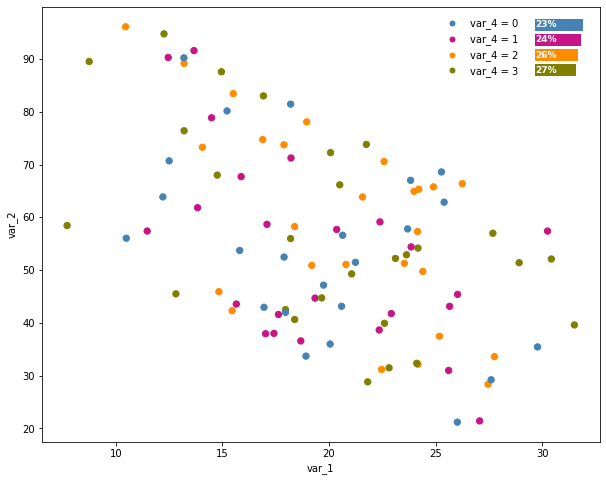

In [499]:

fig, ax = plt.subplots(figsize=(10,8))

color_vect=['steelblue','mediumvioletred','darkorange','olive']
color_dict=dict(zip(df['var_4'].sort_values().unique(),color_vect))

ax.scatter(df['var_1'],df['var_2'],s=40,
           c=df['var_4'].replace(color_dict)) # color according to a third variable
ax.set_xlabel('var_1')
ax.set_ylabel('var_2')

# drawing circles as legend handles: 
from matplotlib.lines import Line2D
def create_handle(color):
    return Line2D(range(1),range(1),color='white', marker='o',markerfacecolor=color,markersize=7)
                  
handles=map(create_handle,color_vect)
labels=['var_4 = {}'.format(value) for value in df['var_4'].sort_values().unique()]

ax.legend(handles=handles,labels=labels,frameon=False, bbox_to_anchor=(.87, .995),)


# Barplot as legend-sized subplot: 

mini_df=df['var_4'].value_counts(normalize=True).sort_index(ascending=False) # index = var values in desc order

a = plt.axes([.81, .755, .07, .11]) # [x_coord,y_coord,x_length,y_length]
mini_hist = plt.barh(mini_df.index,
                     mini_df,
                     color=color_vect) 
plt.xticks([])
plt.yticks([])
for side in ['left','right','top','bottom']:
    a.spines[side].set_visible(False)
    

# proportions on bars: 
for ix,item in zip(range(4), mini_df):
        a.annotate(str(round(item,2)*100).split('.')[0]+'%',(0,ix),
                   va='center',ha='left',color='white',fontsize=9,weight='bold')


### Equal sized subplots

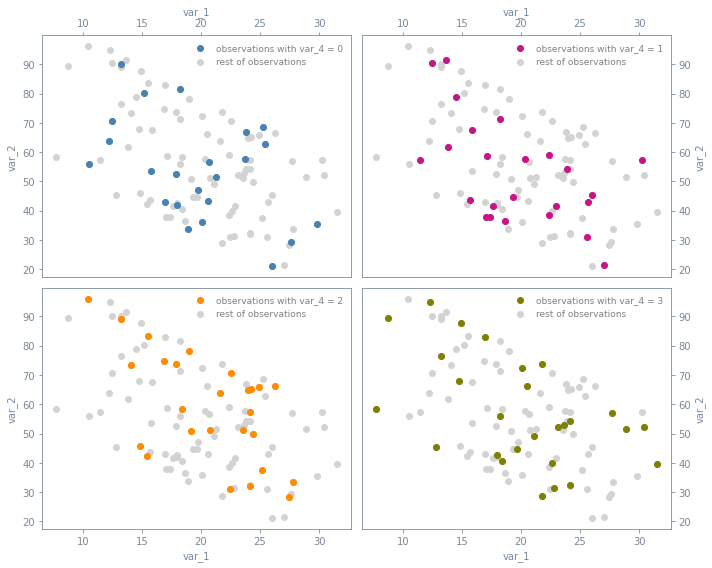

In [545]:
fig, ax = plt.subplots(2,2,figsize=(10,8))

color_matrix=np.array(['steelblue','mediumvioletred','darkorange','olive']).reshape((2,2))
var_val_matrix=np.array(df['var_4'].sort_values().unique()).reshape((2,2))

for i in range(2):
    for j in range(2):
        ax[i,j].scatter(df['var_1'],df['var_2'],color='lightgray',label='rest of observations')
        
        df_temp= df[df['var_4']==var_val_matrix[i,j]]
        ax[i,j].scatter(df_temp['var_1'],df_temp['var_2'],color=color_matrix[i,j], 
                        label= 'observations with var_4 = {}'.format(var_val_matrix[i,j]))
        
        ax[i,j].set_xlabel('var_1',color='lightslategray')
        ax[i,j].set_ylabel('var_2',color='lightslategray')
        
        handles, labels = ax[i,j].get_legend_handles_labels()
        handles = [handles[-i-1] for i in range(len(handles))]
        labels = [labels[-i-1] for i in range(len(labels))]
        
        ax[i,j].legend(handles=handles,labels=labels,frameon=False,labelcolor='gray',fontsize=9)
        
        if j%2!=0: 
            ax[i,j].yaxis.tick_right()
            ax[i,j].yaxis.set_label_position('right')
        if i==0: 
            ax[i,j].xaxis.tick_top()
            ax[i,j].xaxis.set_label_position('top')
        for side in ['left','right','top','bottom']:
            ax[i,j].spines[side].set_color('lightslategray')
        ax[i,j].tick_params(colors='lightslategray')
        
plt.tight_layout()